In [2]:
import matplotlib.pyplot as plt
import pyrosetta as pr
import numpy as np
import pandas as pd
from rotamer_library import load_rotamor_library, all_atom_coordinates_from_restype, restype_1to3 
from mapping_aas import map_pyrosetta_atom_names, get_res_map_martini, map_pyrosetta_martini_names
from formfactor import cSAXSparameters, calculate_distogram, getAAFormFactor_fast, poly6d_fixed
import tqdm
import matplotlib.cm as cm
import os 
import argparse
import csv

pr.init()

libpath = '/Users/isabelvinterbladh/Documents/Github/saxs-python/dunbrack-rotamer/original'
db = load_rotamor_library(libpath)

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python311.Release 2024.42+release.3366cf78a3df04339d1982e94531b77b098ddb99 2024-10-11T08:24:04] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.m1.cxx11thread.serialization.pyth

In [2]:
np.random.seed(0)
np.eye(3)==0


array([[False,  True,  True],
       [ True, False,  True],
       [ True,  True, False]])


 > Calculating bead form factor for ALA ...
core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 0.460542 seconds.


1369it [00:00, 19178.24it/s]


Number of rotamers found in Dunbrack lib: 1369
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', '3HB '] ALA
(1369, 6, 6, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   [63.96817708  0.          0.         ...  0.          0.
     0.        ]
   [67.95961818  0.          0.         ...  0.          0.
     0.        ]
   [71.94331084  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   [55.97515084  0.          0.         ...  0.          0.
     0.        ]
   [59.46784873  0.          0.         .

102675it [00:06, 15321.73it/s]


Number of rotamers found in Dunbrack lib: 102675
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD ', ' NE ', ' CZ ', ' NH1', ' NH2', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', '1HG ', '2HG ', '1HD ', '2HD ', ' HE ', '1HH1', '2HH1', '1HH2', '2HH2'] ARG
(102675, 12, 12, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   [69.27169635  0.          0.         ...  0.          0.
     0.        ]
   [69.27169635  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.   

49284it [00:02, 21626.05it/s]


Number of rotamers found in Dunbrack lib: 49284
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' OD1', ' ND2', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', '1HD2', '2HD2'] ASN
(49284, 9, 9, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   [63.96817708  0.          0.         ...  0.          0.
     0.        ]
   [71.93700975  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [41.96329998  0.          0.         ...  0.          0.
     0.   

24642it [00:00, 25083.63it/s]


Number of rotamers found in Dunbrack lib: 24642
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' OD1', ' OD2', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB '] ASP
(24642, 9, 9, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   [67.95961818  0.          0.         ...  0.          0.
     0.        ]
   [67.95961818  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   [59.46

4107it [00:00, 25889.64it/s]

Number of rotamers found in Dunbrack lib: 4107
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' SG ', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', ' HG '] CYS
(4107, 7, 7, 51)


[[[[ 63.94106957  44.12806751  43.08468711 ...  10.78642961
     10.4730357   10.17114844]
   [ 55.9514305    0.           0.         ...   0.
      0.           0.        ]
   [ 47.95549032   0.           0.         ...   0.
      0.           0.        ]
   ...
   [ 67.95961818   0.           0.         ...   0.
      0.           0.        ]
   [ 63.94737067   0.           0.         ...   0.
      0.           0.        ]
   [135.93398956   0.           0.         ...   0.
      0.           0.        ]]

  [[ 55.9514305    0.           0.         ...   0.
      0.           0.        ]
   [ 48.96012212  30.80198909  29.91848248 ...   6.61348532
      6.4299223    6.25407082]
   [ 41.96329998   0.           0.         ...   0.
      0.           0.        ]
   ...
   [ 59.46784873   0.           0.         ...   0.
      0.           0.        ]
   [ 55.95694425   0.           0.         ...   0.
      0.           0.        ]
   [118.94860721   0.           0.         ...   0.
   

147852it [00:07, 19144.16it/s]


Number of rotamers found in Dunbrack lib: 147852
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD ', ' OE1', ' NE2', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', '1HG ', '2HG ', '1HE2', '2HE2'] GLN
(147852, 10, 10, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   [63.96817708  0.          0.         ...  0.          0.
     0.        ]
   [71.93700975  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [41.96329998  0.          0.         ..

73926it [00:03, 21197.64it/s]


Number of rotamers found in Dunbrack lib: 73926
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD ', ' OE1', ' OE2', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', '1HG ', '2HG '] GLU
(73926, 10, 10, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   [67.95961818  0.          0.         ...  0.          0.
     0.        ]
   [67.95961818  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [41.96329998  0.          0.         ...  0.          0.


1369it [00:00, 32666.77it/s]


Number of rotamers found in Dunbrack lib: 1369
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', '1H  ', '2H  ', '3H  ', '1HA ', '2HA '] GLY
(1369, 5, 5, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [63.94737067  0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   [63.96817708  0.          0.         ...  0.          0.
     0.        ]
   [67.95961818  0.          0.         ...  0.          0.
     0.        ]]

  [[63.94737067  0.          0.         ...  0.          0.
     0.        ]
   [63.95367239 39.87898155 38.7020963  ...  7.60561676  7.3657488
     7.13636475]
   [47.96021611  0.          0.         ...  0.          0.
     0.        ]
   [63.97448085  0.          0.         ...  0.          0.
     0.        ]
   [67.96631528  0.          0.         ...  0.          0.
     0.        ]]

  [[47.95549032  0.          0.         ...  0.          0.
   

49284it [00:02, 19007.55it/s]


Number of rotamers found in Dunbrack lib: 49284
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' ND1', ' CD2', ' CE1', ' NE2', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', ' HD2', ' HE1', ' HE2'] HIS
(49284, 11, 11, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [63.94106957  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [48.96012212  0.          0.         ... 

12321it [00:00, 17355.67it/s]


Number of rotamers found in Dunbrack lib: 12321
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG1', ' CG2', ' CD1', '1H  ', '2H  ', '3H  ', ' HA ', ' HB ', '1HG1', '2HG1', '1HG2', '2HG2', '3HG2', '1HD1', '2HD1', '3HD1'] ILE
(12321, 9, 9, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [63.94737067  0.          0.         ...  0.          0.
     0.        ]
   [71.94331084  0.          0.         ...  0.          0.
     0.        ]
   [71.94331084  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.95694425  0.          0

12321it [00:00, 17501.57it/s]


Number of rotamers found in Dunbrack lib: 12321
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD1', ' CD2', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', ' HG ', '1HD1', '2HD1', '3HD1', '1HD2', '2HD2', '3HD2'] LEU
(12321, 9, 9, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [71.94331084  0.          0.         ...  0.          0.
     0.        ]
   [71.94331084  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [48.96012212  0.          0

99937it [00:06, 15499.12it/s]


Number of rotamers found in Dunbrack lib: 99937
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD ', ' CE ', ' NZ ', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', '1HG ', '2HG ', '1HD ', '2HD ', '1HE ', '2HE ', '1HZ ', '2HZ ', '3HZ '] LYS
(99937, 10, 10, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [63.94737067  0.          0.         ...  0.          0.
     0.        ]
   [63.94737067  0.          0.         ...  0.          0.
     0.        ]
   [71.94078858  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [

36963it [00:01, 18853.19it/s]


Number of rotamers found in Dunbrack lib: 36963
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' SD ', ' CE ', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', '1HG ', '2HG ', '1HE ', '2HE ', '3HE '] MET
(36963, 9, 9, 51)
[[[[ 63.94106957  44.12806751  43.08468711 ...  10.78642961
     10.4730357   10.17114844]
   [ 55.9514305    0.           0.         ...   0.
      0.           0.        ]
   [ 47.95549032   0.           0.         ...   0.
      0.           0.        ]
   ...
   [ 63.94737067   0.           0.         ...   0.
      0.           0.        ]
   [127.93804939   0.           0.         ...   0.
      0.           0.        ]
   [ 71.94331084   0.           0.         ...   0.
      0.           0.        ]]

  [[ 55.9514305    0.           0.         ...   0.
      0.           0.        ]
   [ 48.96012212  30.80198909  29.91848248 ...   6.61348532
      6.4299223    6.25407082]
   [ 41.96329998   0.           0.         ...   0.
      0.           0.       

24642it [00:01, 16984.02it/s]


Number of rotamers found in Dunbrack lib: 24642
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD1', ' CD2', ' CE1', ' CE2', ' CZ ', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', ' HD1', ' HD2', ' HE1', ' HE2', ' HZ '] PHE
(24642, 12, 12, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [48.96012212  0. 

2738it [00:00, 19924.47it/s]

Number of rotamers found in Dunbrack lib: 2738
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD ', ' NV ', 'CAV ', ' HA ', '1HB ', '2HB ', '1HG ', '2HG ', '1HD ', '2HD ', '1H  ', '2H  '] PRO
(2738, 8, 8, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [63.94737067  0.          0.         ...  0.          0.
     0.        ]
   [63.94737067  0.          0.         ...  0.          0.
     0.        ]
   [63.94737067  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.95694425  0.          0.         ...  0.         

functools.partial(<function poly6d_fixed.<locals>.poly_func at 0x302fe1580>, coeffs=array([ 61.4809782 ,   0.        , -56.99411827,  -4.99956447,
        47.28483121, -24.81122491,   3.93254312]))

 > Calculating bead form factor for SER ...


4107it [00:00, 26411.38it/s]

Number of rotamers found in Dunbrack lib: 4107
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' OG ', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', ' HG '] SER
(4107, 7, 7, 51)


[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [67.95961818  0.          0.         ...  0.          0.
     0.        ]
   [63.94737067  0.          0.         ...  0.          0.
     0.        ]
   [71.96411726  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [59.46784873  0.          0.         ...  0.          0.
     0.        ]
   [55.95694425  0.          0.         ...  0.          0.
     0.        ]
   [62.97197297  0.          0.         ...  0.          0.
     0.        ]]

  [[47.95549032  0.          0.         ... 

4107it [00:00, 22559.62it/s]


Number of rotamers found in Dunbrack lib: 4107
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' OG1', ' CG2', '1H  ', '2H  ', '3H  ', ' HA ', ' HB ', ' HG1', '1HG2', '2HG2', '3HG2'] THR
(4107, 8, 8, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [71.96411726  0.          0.         ...  0.          0.
     0.        ]
   [71.94331084  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [48.96012212  0.          0.         ...  0.          0.
     0.     

49284it [00:03, 14564.12it/s]


Number of rotamers found in Dunbrack lib: 49284
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD1', ' CD2', ' NE1', ' CE2', ' CE3', ' CZ2', ' CZ3', ' CH2', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', ' HD1', ' HE1', ' HE3', ' HZ2', ' HZ3', ' HH2'] TRP
(49284, 15, 15, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.     

24642it [00:01, 15894.54it/s]


Number of rotamers found in Dunbrack lib: 24642
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG ', ' CD1', ' CD2', ' CE1', ' CE2', ' CZ ', ' OH ', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', ' HD1', ' HD2', ' HE1', ' HE2', ' HH '] TYR
(24642, 13, 13, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   [71.96411726  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [48.96012

4107it [00:00, 20140.45it/s]


Number of rotamers found in Dunbrack lib: 4107
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', ' CG1', ' CG2', '1H  ', '2H  ', '3H  ', ' HA ', ' HB ', '1HG1', '2HG1', '3HG1', '1HG2', '2HG2', '3HG2'] VAL
(4107, 8, 8, 51)
[[[[63.94106957 44.12806751 43.08468711 ... 10.78642961 10.4730357
    10.17114844]
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [47.95549032  0.          0.         ...  0.          0.
     0.        ]
   ...
   [55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [71.94331084  0.          0.         ...  0.          0.
     0.        ]
   [71.94331084  0.          0.         ...  0.          0.
     0.        ]]

  [[55.9514305   0.          0.         ...  0.          0.
     0.        ]
   [48.96012212 30.80198909 29.91848248 ...  6.61348532  6.4299223
     6.25407082]
   [41.96329998  0.          0.         ...  0.          0.
     0.        ]
   ...
   [48.96012212  0.          0.         ...  0.         

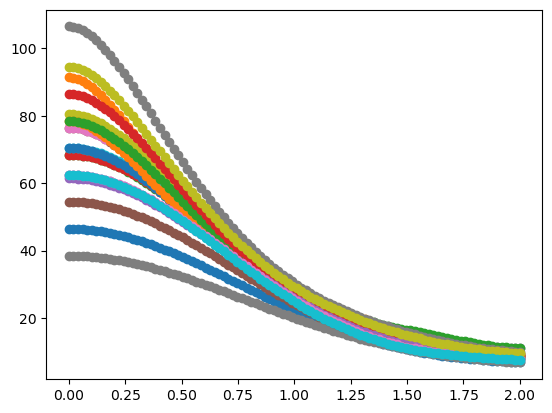

In [3]:
%run formfactor.py

def getAll_FF(qvals, atom_names_mapped_non_hydrogen, all_coordinates_non_hydrogen):
    saxs_params = cSAXSparameters()
    FF = np.array([saxs_params.computeFormFactors(atom_names_mapped_non_hydrogen, q) for q in qvals]).T
    #for atoms in all_coordinates_non_hydrogen:
     #   all_rotamers = []
     #   for i, _q in enumerate(qvals):
            
    amino_FF = saxs_params.getAAFormFactor(qvals, FF, atom_names_mapped_non_hydrogen, all_coordinates_non_hydrogen) 
    return amino_FF #np.array(total, dtype=complex)

with open('poly_coeffs.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Restype', 'Coefficient Index', 'Value'])

    for restype in restype_1to3.keys():
        restype3 = restype_1to3[restype]
        print("\n > Calculating bead form factor for %s ..."%restype3)
        
        all_coordinates, atom_names,elements, probs = all_atom_coordinates_from_restype(restype, db)
        n_rotamer = len(all_coordinates)
        print("Number of rotamers found in Dunbrack lib: %i"%n_rotamer)
        print(atom_names, restype3)
        
        atom_names_mapped = map_pyrosetta_atom_names(atom_names, restype3)
        # let's remove the hydrogrens from the coordinates
        non_hydrogen_indices = [i for i, n in enumerate(atom_names_mapped) if n is not None]
        all_coordinates_non_hydrogen = all_coordinates[:,non_hydrogen_indices]
        atom_names_mapped_non_hydrogen = [n for i, n in enumerate(atom_names_mapped) if i in non_hydrogen_indices]
        qfits = np.linspace(0.75, 2, 50)
        qfits = np.insert(qfits, 0, 0.0)
        #print((np.sqrt(np.sum((coords[..., None, :] - coords[..., None, :, :]) ** 2, axis=-1))[...,None]*qfits))
        
        
        total = getAll_FF(qfits, atom_names_mapped_non_hydrogen, all_coordinates_non_hydrogen)
        #print(total.shape)
        
        V = np.sum((total)*probs[...,None], axis=0)
        #F0 = getAll_FF([0.0], atom_names_mapped_non_hydrogen, all_coordinates_non_hydrogen)
        #qfits = np.insert(qfits, 0, 0.0)
        #V = np.insert(V, 0, np.sum(F0))
        
        poly_coeffs = poly6d_fixed(qfits, V)
        
        print(poly_coeffs)
        qtest = np.linspace(0.0, 2.0, 100)
        plt.plot(qtest, poly_coeffs(x=qtest), 'o')
        
    
        # Save poly_coeffs to a CSV file
        coeffs = poly_coeffs.keywords['coeffs']
        for i, coeff in enumerate(coeffs):
                writer.writerow([restype3, i, coeff])
    
    


In [41]:
%run formfactor.py
restype3 = restype_1to3['A']
restype = 'A'
print("\n > Calculating bead form factor for %s ..."%restype3)
        
all_coordinates, atom_names,elements, probs = all_atom_coordinates_from_restype(restype, db)
n_rotamer = len(all_coordinates)
print("Number of rotamers found in Dunbrack lib: %i"%n_rotamer)
print(atom_names, restype3)
        
atom_names_mapped = map_pyrosetta_atom_names(atom_names, restype3)
        # let's remove the hydrogrens from the coordinates
non_hydrogen_indices = [i for i, n in enumerate(atom_names_mapped) if n is not None]
all_coordinates_non_hydrogen = all_coordinates[:,non_hydrogen_indices]
atom_names_mapped_non_hydrogen = [n for i, n in enumerate(atom_names_mapped) if i in non_hydrogen_indices]
#qfits = np.linspace(0.75, 2, 80)
#qfits = np.insert(qfits, 0, 0.0)
#print((np.sqrt(np.sum((coords[..., None, :] - coords[..., None, :, :]) ** 2, axis=-1))[...,None]*qfits))
qfits = np.array([0,0.1])       
        
total = getAll_FF(qfits, atom_names_mapped_non_hydrogen, all_coordinates_non_hydrogen)
print(total.shape, total)
        
V = np.sum((total)*probs[...,None], axis=0)
print(V)


 > Calculating bead form factor for ALA ...


1369it [00:00, 23814.57it/s]

Number of rotamers found in Dunbrack lib: 1369
[' N  ', ' CA ', ' C  ', ' O  ', ' OXT', ' CB ', '1H  ', '2H  ', '3H  ', ' HA ', '1HB ', '2HB ', '3HB '] ALA
(1369, 6, 6, 2)
[[[[63.94106957 63.49070777]
   [55.9514305   0.        ]
   [47.95549032  0.        ]
   [63.96817708  0.        ]
   [67.95961818  0.        ]
   [71.94331084  0.        ]]

  [[55.9514305   0.        ]
   [48.96012212 48.51866766]
   [41.96329998  0.        ]
   [55.97515084  0.        ]
   [59.46784873  0.        ]
   [62.95376638  0.        ]]

  [[47.95549032  0.        ]
   [41.96329998  0.        ]
   [35.96638385 35.65524622]
   [47.97582082  0.        ]
   [50.96938218  0.        ]
   [53.95713225  0.        ]]

  [[63.96817708  0.        ]
   [55.97515084  0.        ]
   [47.97582082  0.        ]
   [63.99529609 63.66151001]
   [67.98842933  0.        ]
   [71.97381087  0.        ]]

  [[67.95961818  0.        ]
   [59.46784873  0.        ]
   [50.96938218  0.        ]
   [67.98842933  0.        ]
   [72.2

In [7]:
def debye_mem(dgram, q, ff, eps=1e-6):
    F = np.zeros_like(ff)
    print(F.shape)
    N = dgram.shape[0]
    print(N)
    for i in tqdm.tqdm(range(N)):
        dq = dgram[i][...,None] * q[..., None, :]
        indices_zeros = dq<eps
        indices_nonzeros = ~indices_zeros

        ff2 = ff * ff[i][None]

        F[indices_nonzeros] += ff2[indices_nonzeros]  * np.sin(dq [indices_nonzeros]) / dq[indices_nonzeros]
        F[indices_zeros] += ff2[indices_zeros] * (1 - (1/6) * (dq[indices_zeros])**2)

    return np.sum(F, axis=(-2))

In [12]:
V

array([0.08299773, 0.08234792])

In [29]:
%run formfactor.py
qfits = np.array([0,0.1])
saxs_params = cSAXSparameters()
FF = np.array([saxs_params.computeFormFactors(atom_names_mapped_non_hydrogen, q) for q in qfits]).T
dist = calculate_distogram(all_coordinates_non_hydrogen)
getAAFormFactor_fast(dist, qfits, FF)

(1369, 6, 6, 2)
(6, 6, 2)
(6, 6, 2)


IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed